Importing Dependencies


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBRegressor



Importing Data Collection

In [2]:
#loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv(r"C:\Users\Gigabyte\Desktop\medicalmalpractice.csv").head(60000)

#first 5 rows of dataframe
dataset.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


In [3]:
#determining the number of rows and columns in dataset
dataset.shape

(60000, 8)

In [4]:
#getting informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            60000 non-null  int64 
 1   Severity          60000 non-null  int64 
 2   Age               60000 non-null  int64 
 3   Private Attorney  60000 non-null  int64 
 4   Marital Status    60000 non-null  int64 
 5   Specialty         60000 non-null  object
 6   Insurance         60000 non-null  object
 7   Gender            60000 non-null  object
dtypes: int64(5), object(3)
memory usage: 3.7+ MB


Categorical Features: 

-Specialty         
-Insurance         
-Gender            

In [5]:
#checking for missing values 
dataset.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

Data Analysis


In [6]:
#statistical measures of the dataset
dataset.describe()

,Amount,Severity,Age,Private Attorney,Marital Status
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,157207.797850,4.799267,42.657633,0.661250,1.890533
std,193222.112893,2.083661,19.794010,0.473289,1.005402
min,1576.000000,1.000000,0.000000,0.000000,0.000000
25%,43597.250000,3.000000,28.000000,0.000000,1.000000
50%,97659.500000,4.000000,43.000000,1.000000,2.000000
75%,154445.500000,7.000000,58.000000,1.000000,2.000000
max,926411.000000,9.000000,87.000000,1.000000,4.000000


In [7]:
#Specialty  Column Analysis
print(dataset["Specialty"].value_counts(normalize=True)*100)
#number of differente specialtites
dataset["Specialty"].value_counts().count()


Specialty
Family Practice           14.388333
General Surgery           11.806667
OBGYN                     11.210000
Anesthesiology            11.120000
Orthopedic Surgery         9.191667
Internal Medicine          6.623333
Neurology/Neurosurgery     5.998333
Emergency Medicine         5.915000
Ophthamology               4.141667
Cardiology                 3.353333
Urological Surgery         2.570000
Resident                   2.510000
Radiology                  2.490000
Pediatrics                 1.733333
Plastic Surgeon            1.721667
Dermatology                1.715000
Occupational Medicine      0.950000
Pathology                  0.915000
Thoracic Surgery           0.825000
Physical Medicine          0.821667
Name: proportion, dtype: float64


np.int64(20)

In [8]:

#Insurances Column Analysis
print(dataset["Insurance"].value_counts(),"\n")

#number of distinct categories
print(dataset["Insurance"].value_counts().count())
df_filtered = dataset

Insurance
Private                 25913
Unknown                 18287
Medicare/Medicaid        8252
No Insurance             6046
Workers Compensation     1502
Name: count, dtype: int64 

5


<Axes: ylabel='Amount'>

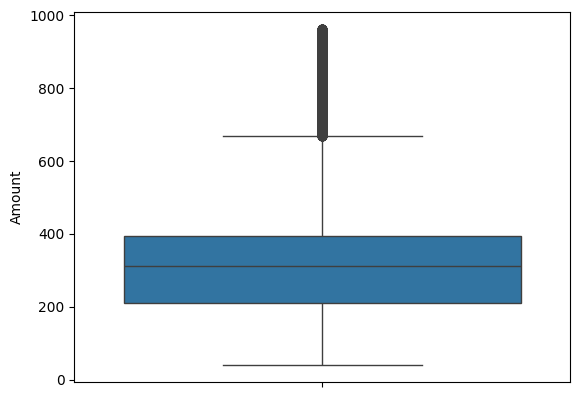

In [9]:

#df_filtered = df_filtered[(df_filtered['Amount'] >= 1576) & (df_filtered['Amount'] <=20000)]

df_filtered['Amount'] = np.sqrt(df_filtered['Amount'] + 1) 
sns.boxplot(df_filtered["Amount"])


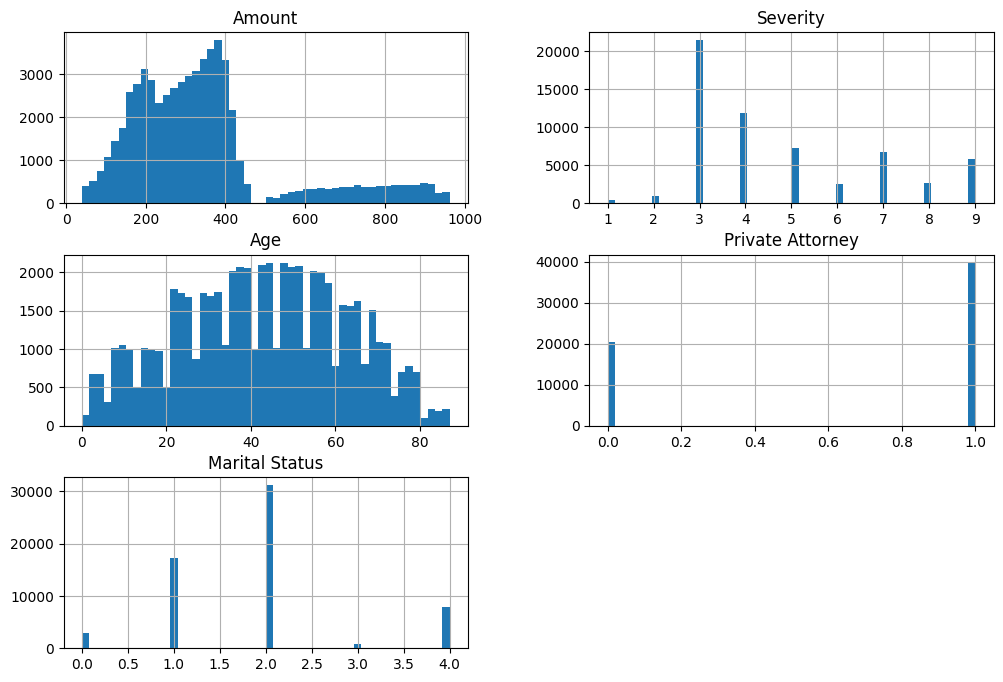

Count of 'Amount' values in range 20500 to 92600: 0


In [10]:
df_filtered.hist(bins =50 ,figsize=(12,8))
plt.show()
# Find the count of 'Amount' values within the range 20500 to 92600
count_in_range = df_filtered[(df_filtered["Amount"] >= 1600) & (df_filtered["Amount"] <= 92600)].shape[0]

print(f"Count of 'Amount' values in range 20500 to 92600: {count_in_range}")


Data Pre-Processing

In [11]:

df_filtered.head()

#getting correlation matrix
print(df_filtered.dtypes)



Amount              float64
Severity              int64
Age                   int64
Private Attorney      int64
Marital Status        int64
Specialty            object
Insurance            object
Gender               object
dtype: object


Incoding Categorical Features

In [12]:

# Find the most frequent category
most_frequent = df_filtered['Insurance'].mode()[0]
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print(dataset.head())

df_filtered['Gender'] = label_encoder.fit_transform(df_filtered['Gender'])

df_filtered.head()



       Amount  Severity  Age  Private Attorney  Marital Status  \
0  238.834671         7   62                 1               2   
1  570.067540         6   38                 1               2   
2  367.945648         4   34                 1               2   
3  910.902300         7   42                 1               1   
4  444.607692         3   60                 0               2   

         Specialty          Insurance  Gender  
0  Family Practice            Private    Male  
1            OBGYN       No Insurance  Female  
2       Cardiology            Unknown    Male  
3       Pediatrics       No Insurance  Female  
4            OBGYN  Medicare/Medicaid  Female  


,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,238.834671,7,62,1,2,Family Practice,Private,1
1,570.067540,6,38,1,2,OBGYN,No Insurance,0
2,367.945648,4,34,1,2,Cardiology,Unknown,1
3,910.902300,7,42,1,1,Pediatrics,No Insurance,0
4,444.607692,3,60,0,2,OBGYN,Medicare/Medicaid,0


In [13]:


from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'dataset' is your original dataframe

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid the dummy variable trap

# Reshape the 'Specialty' column to a 2D array (necessary for sklearn)
specialty_encoded = encoder.fit_transform(df_filtered[['Specialty']])

# Convert the encoded array into a DataFrame with column names as the unique values in 'Specialty'
encoded_df = pd.DataFrame(specialty_encoded, columns=encoder.get_feature_names_out(['Specialty']))

# Concatenate the encoded columns with the original dataset (excluding the original 'Specialty' column)
df_encoded = pd.concat([df_filtered.drop('Specialty', axis=1), encoded_df], axis=1)

# Checking the first few rows of the updated dataset
# df_encoded.head()
#df_encoded.dropna(subset=['Amount'], inplace=True)
#df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)
df_encoded.head()



,Amount,Severity,Age,Private Attorney,Marital Status,Insurance,Gender,Specialty_Cardiology,Specialty_Dermatology,Specialty_Emergency Medicine,...,Specialty_Ophthamology,Specialty_Orthopedic Surgery,Specialty_Pathology,Specialty_Pediatrics,Specialty_Physical Medicine,Specialty_Plastic Surgeon,Specialty_Radiology,Specialty_Resident,Specialty_Thoracic Surgery,Specialty_Urological Surgery
0,238.834671,7,62,1,2,Private,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,570.067540,6,38,1,2,No Insurance,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,367.945648,4,34,1,2,Unknown,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,910.902300,7,42,1,1,No Insurance,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,444.607692,3,60,0,2,Medicare/Medicaid,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Encoding Insurance column
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the Insurance column
encoded_data = encoder.fit_transform(df_encoded[['Insurance']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Insurance']))

# Concatenate the encoded DataFrame with the existing df_encoded (which already contains Specialty encoding)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Drop the original Insurance column
df_encoded.drop('Insurance', axis=1, inplace=True)

# Checking the first few rows
print(df_encoded.shape)
df_encoded.info()
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['Age',"Marital Status","Severity",]
scaler = MinMaxScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])
df_encoded.head()

(60000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Amount                            60000 non-null  float64
 1   Severity                          60000 non-null  int64  
 2   Age                               60000 non-null  int64  
 3   Private Attorney                  60000 non-null  int64  
 4   Marital Status                    60000 non-null  int64  
 5   Gender                            60000 non-null  int64  
 6   Specialty_Cardiology              60000 non-null  float64
 7   Specialty_Dermatology             60000 non-null  float64
 8   Specialty_Emergency Medicine      60000 non-null  float64
 9   Specialty_Family Practice         60000 non-null  float64
 10  Specialty_General Surgery         60000 non-null  float64
 11  Specialty_Internal Medicine       60000 non-null  float

,Amount,Severity,Age,Private Attorney,Marital Status,Gender,Specialty_Cardiology,Specialty_Dermatology,Specialty_Emergency Medicine,Specialty_Family Practice,...,Specialty_Plastic Surgeon,Specialty_Radiology,Specialty_Resident,Specialty_Thoracic Surgery,Specialty_Urological Surgery,Insurance_Medicare/Medicaid,Insurance_No Insurance,Insurance_Private,Insurance_Unknown,Insurance_Workers Compensation
0,238.834671,0.750,0.712644,1,0.50,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,570.067540,0.625,0.436782,1,0.50,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,367.945648,0.375,0.390805,1,0.50,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,910.902300,0.750,0.482759,1,0.25,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,444.607692,0.250,0.689655,0,0.50,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Splitting Features and Target


In [15]:
df_encoded.dropna(subset=['Amount'], inplace=True)
df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)

C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_23300\1910219017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Amount'].fillna(df_encoded['Amount'].mean(), inplace=True)


Splitting the data into Training Data & Testing Data

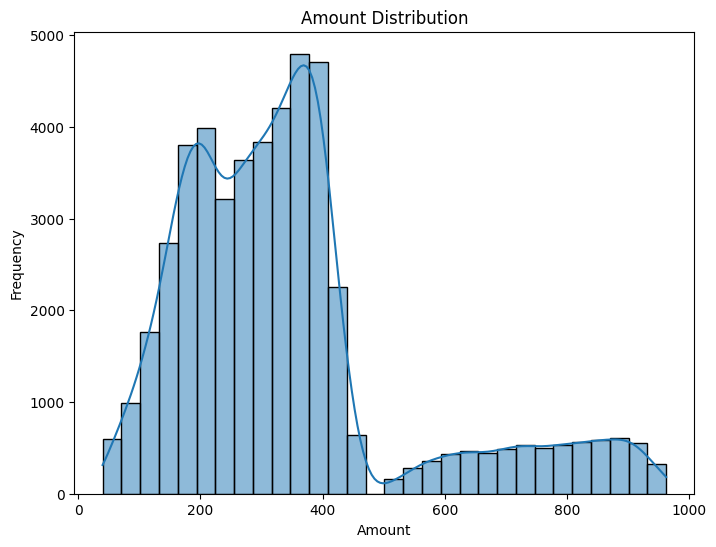

In [16]:

X = df_encoded.drop('Amount', axis=1)
y = df_encoded['Amount']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'Severity' is a categorical feature in X
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, X['Severity']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]


plt.figure(figsize=(8, 6))
sns.histplot(Y_train, kde=True, bins=30)  
plt.title("Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [17]:
print(X.shape,X_train.shape,X_test.shape)






(60000, 29) (48000, 29) (12000, 29)


Model Training

In [18]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=6)  # You can change the degree as needed
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)


In [19]:
# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# X_poly_train_scaled = scaler.fit_transform(X_poly_train)
# X_poly_test_scaled = scaler.transform(X_poly_test)


In [20]:
# poly_regressor = RandomForestRegressor()
# poly_regressor.fit(X_train, Y_train)
print(Y_train.isnull().sum())  # Check for NaN values
X_train.head()
X_train.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 27443 to 6527
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Severity                          48000 non-null  float64
 1   Age                               48000 non-null  float64
 2   Private Attorney                  48000 non-null  int64  
 3   Marital Status                    48000 non-null  float64
 4   Gender                            48000 non-null  int64  
 5   Specialty_Cardiology              48000 non-null  float64
 6   Specialty_Dermatology             48000 non-null  float64
 7   Specialty_Emergency Medicine      48000 non-null  float64
 8   Specialty_Family Practice         48000 non-null  float64
 9   Specialty_General Surgery         48000 non-null  float64
 10  Specialty_Internal Medicine       48000 non-null  float64
 11  Specialty_Neurology/Neurosurgery  48000 non-null  float64
 12  Spec

In [21]:
#Applying RandomForest Regressor to fit the data
linear_model = RandomForestRegressor(bootstrap=True,n_estimators=271,max_depth=28,max_features="log2",min_samples_leaf=1,min_samples_split=18)
linear_model.fit(X_train, Y_train)


RandomForestRegressor(max_depth=28, max_features='log2', min_samples_split=18,
                      n_estimators=271)

XGB Regressor Fitting

In [22]:
#linear_model =XGBRegressor(base_score=None, booster=None, callbacks=None,
            #   colsample_bylevel=None, colsample_bynode=None,
            #   colsample_bytree=0.85, device=None, early_stopping_rounds=None,
            #   enable_categorical=False, eval_metric=None, feature_types=None,
            #   gamma=None, grow_policy=None, importance_type=None,
            #   interaction_constraints=None, learning_rate=0.01, max_bin=None,
            #  max_cat_threshold=None, max_cat_to_onehot=None,
            #   max_delta_step=None, max_depth=9, max_leaves=None,
            #   min_child_weight=None, monotone_constraints=None,
            #   multi_strategy=None, n_estimators=350, n_jobs=None,
            #  num_parallel_tree=None, random_state=42)

Model Evaluation

In [23]:
training_data_prediction = linear_model.predict(X_train)
test_data_prediction = linear_model.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error, r2_score
r2_train = r2_score(Y_train, training_data_prediction)
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared value (Train): ', r2_train)
print('R squared value (Test): ', r2_test)



R squared value (Train):  0.7202860740900008
R squared value (Test):  0.6371226416068423


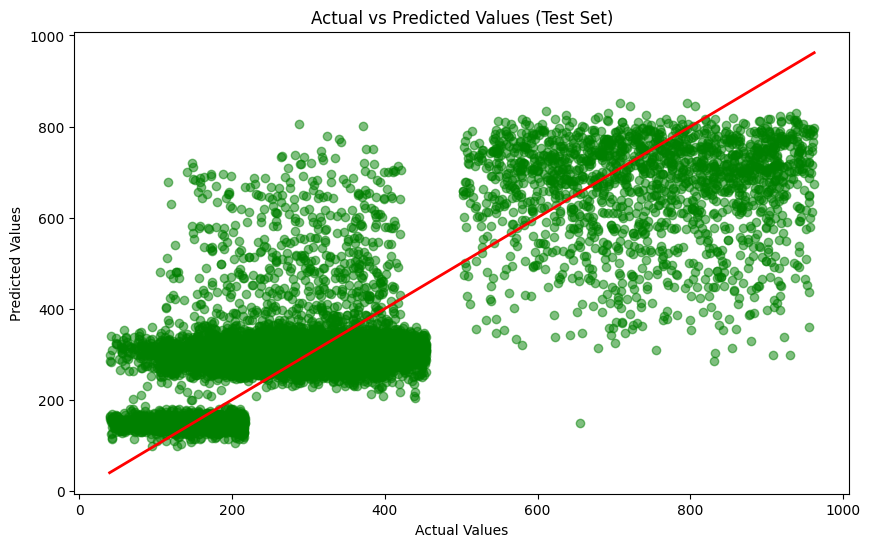

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='green', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


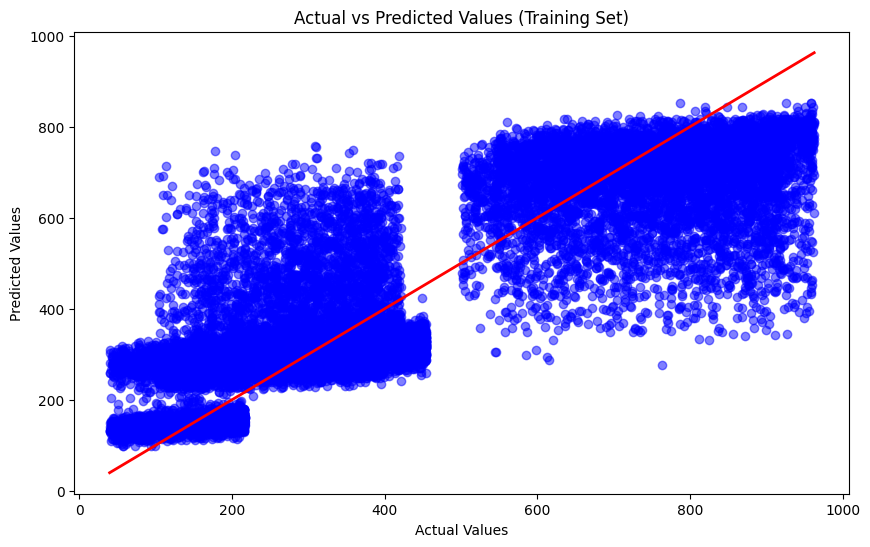

In [26]:
# Assuming Y_train and training_data_prediction are your actual and predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue', alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()
